<a href="https://colab.research.google.com/github/chrispinheiro/tech-challenge/blob/main/tech_chalenge_0524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

# Carregando os dados do arquivo CSV
dados_seguro_saude = pd.read_csv('/content/seguro_saude.csv',encoding='latin1')

# Visualizando as primeiras linhas do DataFrame para verificar a estrutura dos dados
print(dados_seguro_saude.head())

# Calculando estatísticas descritivas básicas
estatisticas_descritivas = dados_seguro_saude.describe()
print(estatisticas_descritivas)

   Idade     Gênero    IMC  Filhos Fumante  Região  Encargos Anuais
0     35      Outro  18.08       2     Sim     Sul         42735.55
1     51  Masculino  33.31       2     Não  Centro         20346.67
2     26  Masculino  26.68       1     Não     Sul         16136.84
3     56      Outro  17.04       4     Não   Norte         49759.78
4     90   Feminino  37.81       1     Não   Oeste         16426.93
             Idade          IMC       Filhos  Encargos Anuais
count  1000.000000  1000.000000  1000.000000      1000.000000
mean     53.845000    27.333840     2.468000     30413.460320
std      20.784152     7.423478     1.725095     11321.125497
min      18.000000    15.000000     0.000000     10054.640000
25%      36.000000    20.640000     1.000000     21184.302500
50%      53.000000    27.330000     2.000000     30735.055000
75%      71.000000    34.130000     4.000000     39996.810000
max      90.000000    39.980000     5.000000     49986.040000


# Nova seção

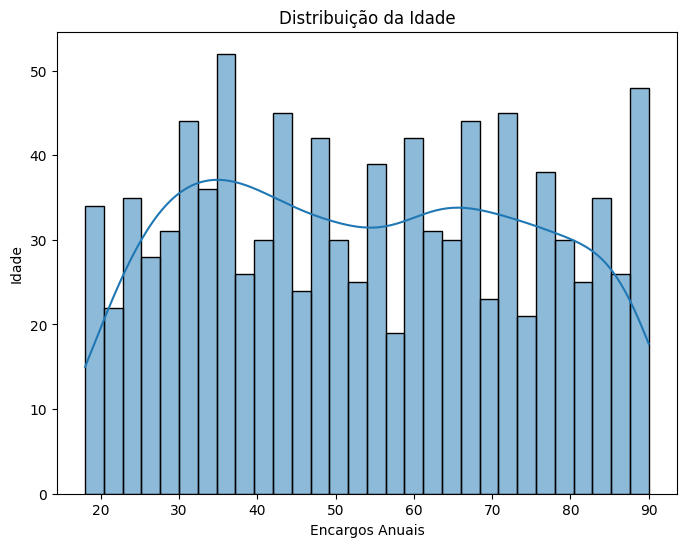

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a distribuição da Idade
plt.figure(figsize=(8, 6))
sns.histplot(dados_seguro_saude['Idade'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Encargos Anuais')
plt.ylabel('Idade')
plt.show()



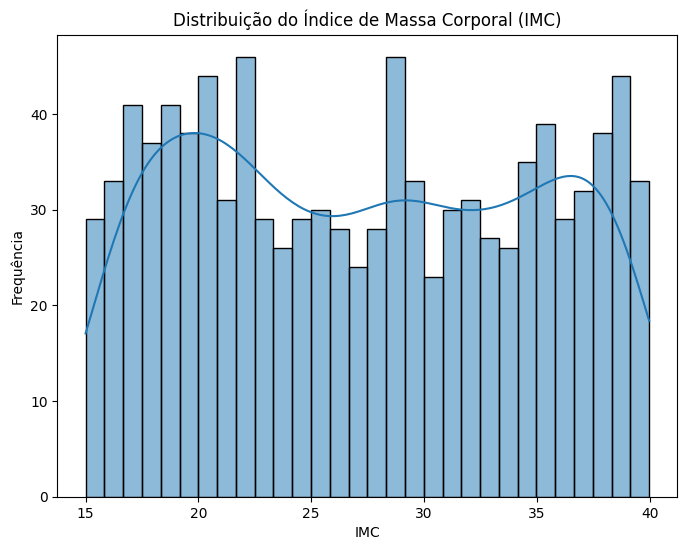

In [22]:
# Visualizando a distribuição do IMC
plt.figure(figsize=(8, 6))
sns.histplot(dados_seguro_saude['IMC'], bins=30, kde=True)
plt.title('Distribuição do Índice de Massa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()



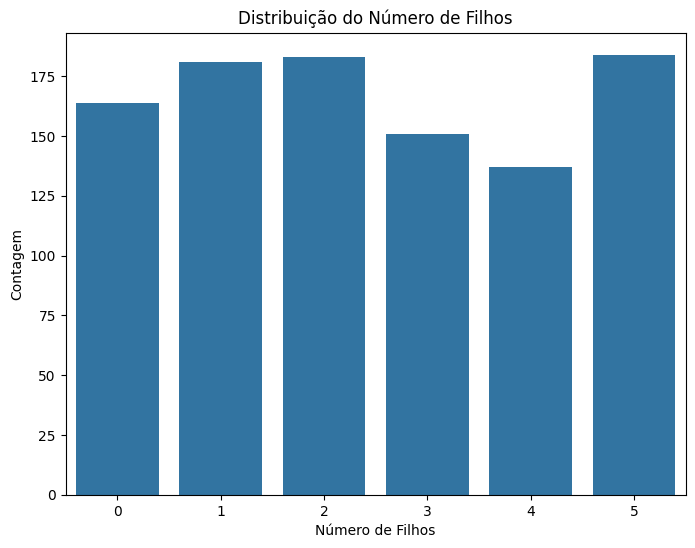

In [23]:
# Visualizando a distribuição do Número de Filhos
plt.figure(figsize=(8, 6))
sns.countplot(data=dados_seguro_saude, x='Filhos')
plt.title('Distribuição do Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Contagem')
plt.show()



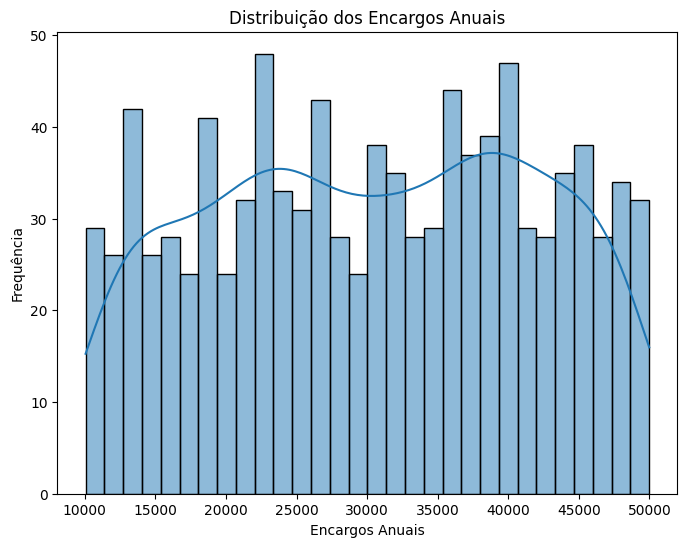

In [24]:
# Visualizando a distribuição dos Encargos Anuais
plt.figure(figsize=(8, 6))
sns.histplot(dados_seguro_saude['Encargos Anuais'], bins=30, kde=True)
plt.title('Distribuição dos Encargos Anuais')
plt.xlabel('Encargos Anuais')
plt.ylabel('Frequência')
plt.show()

In [25]:
# Preencher valores ausentes na coluna IMC com a média
dados_seguro_saude['IMC'].fillna(dados_seguro_saude['IMC'].mean(), inplace=True)

In [26]:
# Preencher valores ausentes na coluna Encargos Anuais com a mediana
dados_seguro_saude['Encargos Anuais'].fillna(dados_seguro_saude['Encargos Anuais'].median(), inplace=True)

In [27]:
# Remover linhas com valores ausentes em qualquer coluna
dados_seguro_saude.dropna(axis=0, how='any', inplace=True)

In [28]:
# Verificar se ainda existem valores ausentes
valores_ausentes_apos_tratamento = dados_seguro_saude.isnull().sum()
print(valores_ausentes_apos_tratamento)

Idade              0
Gênero             0
IMC                0
Filhos             0
Fumante            0
Região             0
Encargos Anuais    0
dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dados_seguro_saude['Gênero'] = label_encoder.fit_transform(dados_seguro_saude['Gênero'])

In [30]:
dados_seguro_saude['Fumante'] = label_encoder.fit_transform(dados_seguro_saude['Fumante'])

In [31]:
dados_seguro_saude['Região'] = label_encoder.fit_transform(dados_seguro_saude['Região'])

In [32]:
print(dados_seguro_saude.describe())  # Estatísticas resumidas
print(dados_seguro_saude.info())       # Informações sobre o DataFrame
print(dados_seguro_saude.head())       # Visualizar as primeiras linhas

             Idade      Gênero          IMC       Filhos      Fumante  \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean     53.845000     1.01300    27.333840     2.468000     0.493000   
std      20.784152     0.81209     7.423478     1.725095     0.500201   
min      18.000000     0.00000    15.000000     0.000000     0.000000   
25%      36.000000     0.00000    20.640000     1.000000     0.000000   
50%      53.000000     1.00000    27.330000     2.000000     0.000000   
75%      71.000000     2.00000    34.130000     4.000000     1.000000   
max      90.000000     2.00000    39.980000     5.000000     1.000000   

            Região  Encargos Anuais  
count  1000.000000      1000.000000  
mean      1.958000     30413.460320  
std       1.409334     11321.125497  
min       0.000000     10054.640000  
25%       1.000000     21184.302500  
50%       2.000000     30735.055000  
75%       3.000000     39996.810000  
max       4.000000     49986.040000  


In [33]:
corr_matrix = dados_seguro_saude.corr()
corr_matrix["Encargos Anuais"].sort_values(ascending=False)

Encargos Anuais    1.000000
Filhos             0.020618
IMC                0.010086
Fumante            0.008250
Idade              0.003937
Gênero            -0.005321
Região            -0.011714
Name: Encargos Anuais, dtype: float64

In [34]:
print(dados_seguro_saude)

     Idade  Gênero    IMC  Filhos  Fumante  Região  Encargos Anuais
0       35       2  18.08       2        1       4         42735.55
1       51       1  33.31       2        0       0         20346.67
2       26       1  26.68       1        0       4         16136.84
3       56       2  17.04       4        0       2         49759.78
4       90       0  37.81       1        0       3         16426.93
..     ...     ...    ...     ...      ...     ...              ...
995     83       0  30.20       3        1       2         49757.08
996     44       0  28.24       2        1       2         42075.34
997     21       2  21.87       2        0       4         27593.23
998     77       1  17.04       1        0       3         12993.29
999     58       0  30.46       2        1       0         37411.15

[1000 rows x 7 columns]


In [36]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Dividindo os dados em recursos (X) e rótulos (y)
X = dados_seguro_saude.drop(columns=['Encargos Anuais'],axis=1)  # Recursos: todas as colunas exceto 'Encargos Anuais'
y = dados_seguro_saude['Encargos Anuais']  # Rótulos: coluna 'Encargos Anuais'

In [41]:
from sklearn.preprocessing import StandardScaler
# Padronizando os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

In [42]:
# Exibindo os dados padronizados
df_padronizado = pd.DataFrame(X_padronizado, columns=X.columns)
df_padronizado['Encargos Anuais'] = y  # Adicionando a coluna 'Encargos Anuais' de volta ao DataFrame
print(df_padronizado)

        Idade    Gênero       IMC    Filhos   Fumante    Região  \
0   -0.907154  1.215990 -1.247188 -0.271425  1.014099  1.449636   
1   -0.136952 -0.016016  0.805438 -0.271425 -0.986097 -1.390004   
2   -1.340393 -0.016016 -0.088121 -0.851394 -0.986097  1.449636   
3    0.103737  1.215990 -1.387354  0.888512 -0.986097  0.029816   
4    1.740417 -1.248023  1.411926 -0.851394 -0.986097  0.739726   
..        ...       ...       ...       ...       ...       ...   
995  1.403453 -1.248023  0.386287  0.308543  1.014099  0.029816   
996 -0.473915 -1.248023  0.122128 -0.271425  1.014099  0.029816   
997 -1.581081  1.215990 -0.736390 -0.271425 -0.986097  1.449636   
998  1.114627 -0.016016 -1.387354 -0.851394 -0.986097  0.739726   
999  0.200012 -1.248023  0.421329 -0.271425  1.014099 -1.390004   

     Encargos Anuais  
0           42735.55  
1           20346.67  
2           16136.84  
3           49759.78  
4           16426.93  
..               ...  
995         49757.08  
996        

In [43]:
import statsmodels.api as sm

In [44]:
# Adicionar uma constante para o termo de intercepto (o que é?)
df_padronizado['Intercepto'] = 1
# Definir as variáveis independentes (X)
X = df_padronizado[['Idade', 'Gênero', 'IMC','Filhos','Fumante','Região','Intercepto']]
# Definir a variável dependente (Y)
Y = df_padronizado['Encargos Anuais']
# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()
# Imprimir os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        Encargos Anuais   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1309
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.992
Time:                        00:12:38   Log-Likelihood:                -10752.
No. Observations:                1000   AIC:                         2.152e+04
Df Residuals:                     993   BIC:                         2.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Idade         32.4715    360.984      0.090      0.9

In [45]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE): ", mse)  # Erro Quadrático Médio
print("Coeficiente de Determinação (R2): ", r2)  # Coeficiente de Determinação

Erro Quadrático Médio (MSE):  133142605.6744249
Coeficiente de Determinação (R2):  -0.007114512748202628


exemplo_tech_chalange